In [1]:
import glob
import os

import matplotlib.pyplot as plt
# import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


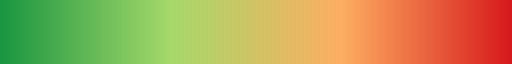

In [4]:
cmap

# Reading G(r) data

## Find the subfolders in the current working folder (cwd)

In [5]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Documents/20240602_XPD/Cs_033_Br_167_/'
subfolder = glob.glob(cwd + '/**.gr')
subfolder.sort()
# subfolder_Cl.reverse()
# del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Documents/20240602_XPD/Cs_033_Br_167_/Cs_033_Br_167_PF_020_Tol_1100_20240603-035654_4accd1_primary-1_mean_q.gr
/Users/chenghunglin/Documents/20240602_XPD/Cs_033_Br_167_/Cs_033_Br_167_PF_022_ZnCl_020_Tol_1210_20240603-043640_608bf1_primary-1_mean_q.gr
/Users/chenghunglin/Documents/20240602_XPD/Cs_033_Br_167_/Cs_033_Br_167_PF_025_ZnCl_050_Tol_1375_20240603-050641_ad5ddd_primary-1_mean_q.gr
/Users/chenghunglin/Documents/20240602_XPD/Cs_033_Br_167_/Cs_033_Br_167_PF_030_ZnCl_100_Tol_1650_20240603-055600_827056_primary-1_mean_q.gr
/Users/chenghunglin/Documents/20240602_XPD/Cs_033_Br_167_/Cs_033_Br_167_PF_040_ZnCl_200_Tol_2200_20240603-062247_ad21d5_primary-1_mean_q.gr


## Reorder subfolder list

In [6]:
# chi_list = []
# chi_list.append(subfolder[-1])
# for i in range(4):
#     chi_list.append(subfolder[i])
# print(*chi_list, sep = '\n')  ## Print one element per line

## Read data into pandas dataframe

In [7]:
label = ['Cs_033_Br_167_ZnCl_000', 'Cs_033_Br_167_ZnCl_020', 
         'Cs_033_Br_167_ZnCl_050', 'Cs_033_Br_167_ZnCl_100', 
         'Cs_033_Br_167_ZnCl_200']

In [8]:
df_r = pd.DataFrame()
df_gr = pd.DataFrame()

for i in range(len(subfolder)):
    # data_files = glob.glob(subfolder[i] + '/**tth.chi')
    # data_files = glob.glob(subfolder[i] + '/raw_tiff_xy/**.xy')
    # data_files.sort()
    # del data_files[0]
    # suffix = os.path.basename(chi_list[i])
    suffix = label[i]

    skiprows = 26 ## skip 23 rows if data processed by dioptas or ## 8
    # df_temp = pd.DataFrame()
    
    df = pd.read_csv(subfolder[i], skiprows=skiprows, sep=' ', names=[f'r_{i:02d}', f'{suffix}'])
    df_r = pd.concat([df_r, df[f'r_{i:02d}']], axis=1, ignore_index=False)
    df_gr = pd.concat([df_gr, df[f'{suffix}']], axis=1, ignore_index=False)
    
    
#     for j in range(len(data_files)):        
#         df = pd.read_csv(data_files[j], skiprows=skiprows, sep='  ', names=[f'tth_{suffix}-{j:02d}', f'{suffix}-{j:02d}'])
#         df_temp = pd.concat([df_temp, df[f'{suffix}-{j:02d}']], axis=1, ignore_index=False)
#         df_int = pd.concat([df_int, df[f'{suffix}-{j:02d}']], axis=1, ignore_index=False)
    
#     df_tth = pd.concat([df_tth, df[f'tth_{suffix}-{j:02d}']], axis=1, ignore_index=False)
#     df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
#     df_int = pd.concat([df_int, df_temp[f'{suffix}_mean']], axis=1, ignore_index=False)
    

In [9]:
df_r

,r_00,r_01,r_02,r_03,r_04
0,1.00,1.00,1.00,1.00,1.00
1,1.01,1.01,1.01,1.01,1.01
2,1.02,1.02,1.02,1.02,1.02
3,1.03,1.03,1.03,1.03,1.03
4,1.04,1.04,1.04,1.04,1.04
...,...,...,...,...,...
7896,79.96,79.96,79.96,79.96,79.96
7897,79.97,79.97,79.97,79.97,79.97
7898,79.98,79.98,79.98,79.98,79.98
7899,79.99,79.99,79.99,79.99,79.99


# Check data in pd dataframe

In [10]:
df_gr.keys()

Index(['Cs_033_Br_167_ZnCl_000', 'Cs_033_Br_167_ZnCl_020',
       'Cs_033_Br_167_ZnCl_050', 'Cs_033_Br_167_ZnCl_100',
       'Cs_033_Br_167_ZnCl_200'],
      dtype='object')

In [11]:
# tth_step = []
# for i in range(df_tth.shape[0]-1):
#     tth_step.append(df_tth.iloc[i,1] - df_tth.iloc[i+1,1])

In [12]:
# tth_step[:10]

In [13]:
df_r.shape

(7901, 5)

In [14]:
df_gr

,Cs_033_Br_167_ZnCl_000,Cs_033_Br_167_ZnCl_020,Cs_033_Br_167_ZnCl_050,Cs_033_Br_167_ZnCl_100,Cs_033_Br_167_ZnCl_200
0,-0.317722,-0.093812,-0.099589,-0.015230,-0.112077
1,-0.278910,-0.086795,-0.097004,-0.045727,-0.155758
2,-0.245997,-0.084676,-0.097332,-0.079154,-0.200543
3,-0.219823,-0.087655,-0.100710,-0.115117,-0.245809
4,-0.201152,-0.095873,-0.107234,-0.153192,-0.290926
...,...,...,...,...,...
7896,-0.004699,-0.008146,-0.012098,0.000531,-0.006723
7897,-0.004549,-0.008056,-0.011374,0.000637,-0.005443
7898,-0.004359,-0.008006,-0.010670,0.000665,-0.004188
7899,-0.004130,-0.007999,-0.009994,0.000624,-0.002976


# Plot data

In [15]:
# title = ['CsPbBr_200uL_Cl_64', 
#          'CsPbBr_200uL_Cl_32', 
#          'CsPbBr_200uL_Cl_16', 
#          'CsPbBr_200uL_Cl_08', 
#          'CsPbBr_200uL_Cl_0',
#          'CsPbBr_100uL', 
#          'CsPbBr_100uL_I_08uL', 
#          'CsPbBr_100uL_I_16uL', 
#          'CsPbBr_100uL_I_32uL', 
#          'CsPbBr_100uL_I_64uL']

# title = ['ZnCl 00 uL/min', 
#          'ZnCl 08 uL/min', 
#          'Zncl 16 uL/min', 
#          'ZnCl 32 uL/min', 
#          'ZnCl 64 uL/min']
         
title = label

## Prepare keys for average scans in pd dataframe

In [16]:
keys_list = list(df_gr.keys())
k1 = [k for k in keys_list if 'Cl' in k]
k1

['Cs_033_Br_167_ZnCl_000',
 'Cs_033_Br_167_ZnCl_020',
 'Cs_033_Br_167_ZnCl_050',
 'Cs_033_Br_167_ZnCl_100',
 'Cs_033_Br_167_ZnCl_200']

In [17]:
df_gr[k1[0]]

0      -0.317722
1      -0.278910
2      -0.245997
3      -0.219823
4      -0.201152
          ...   
7896   -0.004699
7897   -0.004549
7898   -0.004359
7899   -0.004130
7900   -0.003863
Name: Cs_033_Br_167_ZnCl_000, Length: 7901, dtype: float64

## Plot average scans together

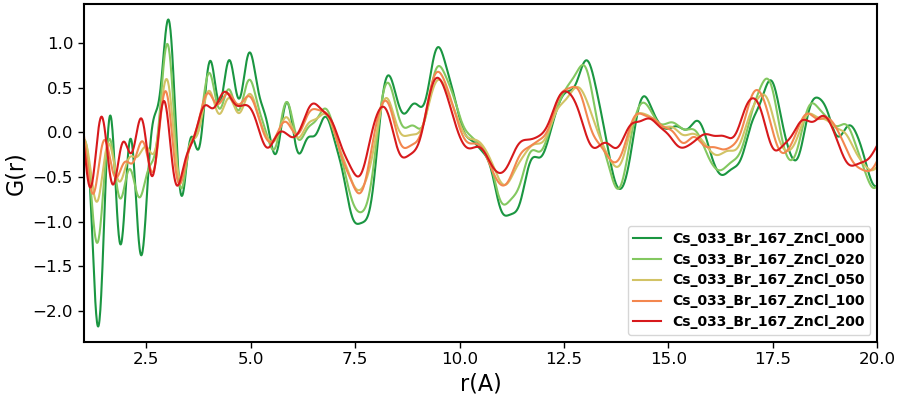

In [40]:
f1, ax1 = plt.subplots(1, 1, figsize = (9, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

# mpld3.disable_notebook()
# label = title
# k = len(title)
color_idx = np.linspace(0, 1, len(k1))
offset = 0
for i in range(len(k1)):
    # ax1.plot(df_tth.iloc[:,i], df_int.iloc[:,i], color=cmap(color_idx[i]), label=label[i])
    ax1.plot(df_r.iloc[:,i], df_gr[k1[i]]+offset*i, color=cmap(color_idx[i]), label=k1[i])

legend_properties = {'weight':'bold', 'size':10}    
ax1.legend(prop=legend_properties)

ax1.set_xlim(1.0, 20)
# ax1.set_ylim(2500, 9500)
ax1.set_xlabel('r(A)', fontsize=16, fontweight='regular')
ax1.set_ylabel('G(r)', fontsize=16, fontweight='regular')
ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

# Reading tth data

## Find the subfolders in the current working folder (cwd)

In [19]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Documents/20240602_XPD/Cs_033_Br_167_/'
subfolder = glob.glob(cwd + '/**tth.chi')
subfolder.sort()
# subfolder_Cl.reverse()
# del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Documents/20240602_XPD/Cs_033_Br_167_/Cs_033_Br_167_PF_020_Tol_1100_20240603-035654_4accd1_primary-1_mean_tth.chi
/Users/chenghunglin/Documents/20240602_XPD/Cs_033_Br_167_/Cs_033_Br_167_PF_022_ZnCl_020_Tol_1210_20240603-043640_608bf1_primary-1_mean_tth.chi
/Users/chenghunglin/Documents/20240602_XPD/Cs_033_Br_167_/Cs_033_Br_167_PF_025_ZnCl_050_Tol_1375_20240603-050641_ad5ddd_primary-1_mean_tth.chi
/Users/chenghunglin/Documents/20240602_XPD/Cs_033_Br_167_/Cs_033_Br_167_PF_030_ZnCl_100_Tol_1650_20240603-055600_827056_primary-1_mean_tth.chi
/Users/chenghunglin/Documents/20240602_XPD/Cs_033_Br_167_/Cs_033_Br_167_PF_040_ZnCl_200_Tol_2200_20240603-062247_ad21d5_primary-1_mean_tth.chi


## Read data into pandas dataframe

In [20]:
label = ['Cs_033_Br_167_ZnCl_000', 'Cs_033_Br_167_ZnCl_020', 
         'Cs_033_Br_167_ZnCl_050', 'Cs_033_Br_167_ZnCl_100', 
         'Cs_033_Br_167_ZnCl_200']

In [21]:
df_tth = pd.DataFrame()
df_int = pd.DataFrame()

for i in range(len(subfolder)):
    # data_files = glob.glob(subfolder[i] + '/**tth.chi')
    # data_files = glob.glob(subfolder[i] + '/raw_tiff_xy/**.xy')
    # data_files.sort()
    # del data_files[0]
    # suffix = os.path.basename(chi_list[i])
    suffix = label[i]

    skiprows = 26 ## skip 23 rows if data processed by dioptas or ## 8
    # df_temp = pd.DataFrame()
    
    df = pd.read_csv(subfolder[i], skiprows=skiprows, sep=' ', names=[f'tth_{i:02d}', f'{suffix}'])
    df_tth = pd.concat([df_tth, df[f'tth_{i:02d}']], axis=1, ignore_index=False)
    df_int = pd.concat([df_int, df[f'{suffix}']], axis=1, ignore_index=False)
    
    
#     for j in range(len(data_files)):        
#         df = pd.read_csv(data_files[j], skiprows=skiprows, sep='  ', names=[f'tth_{suffix}-{j:02d}', f'{suffix}-{j:02d}'])
#         df_temp = pd.concat([df_temp, df[f'{suffix}-{j:02d}']], axis=1, ignore_index=False)
#         df_int = pd.concat([df_int, df[f'{suffix}-{j:02d}']], axis=1, ignore_index=False)
    
#     df_tth = pd.concat([df_tth, df[f'tth_{suffix}-{j:02d}']], axis=1, ignore_index=False)
#     df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
#     df_int = pd.concat([df_int, df_temp[f'{suffix}_mean']], axis=1, ignore_index=False)
    

In [22]:
df_tth

,tth_00,tth_01,tth_02,tth_03,tth_04
0,0.806470,0.806470,0.806470,0.806470,0.806470
1,0.823222,0.823222,0.823222,0.823222,0.823222
2,0.839975,0.839975,0.839975,0.839975,0.839975
3,0.856727,0.856727,0.856727,0.856727,0.856727
4,0.873480,0.873480,0.873480,0.873480,0.873480
...,...,...,...,...,...
2970,50.561580,50.561580,50.561580,50.561580,50.561580
2971,50.578332,50.578332,50.578332,50.578332,50.578332
2972,50.595085,50.595085,50.595085,50.595085,50.595085
2973,50.611838,50.611838,50.611838,50.611838,50.611838


# Check data in pd dataframe

In [23]:
df_int.keys()

Index(['Cs_033_Br_167_ZnCl_000', 'Cs_033_Br_167_ZnCl_020',
       'Cs_033_Br_167_ZnCl_050', 'Cs_033_Br_167_ZnCl_100',
       'Cs_033_Br_167_ZnCl_200'],
      dtype='object')

In [24]:
tth_step = []
for i in range(df_tth.shape[0]-1):
    tth_step.append(df_tth.iloc[i,1] - df_tth.iloc[i+1,1])

In [25]:
tth_step[:10]

[-0.01675256241500267,
 -0.016752562415002337,
 -0.01675256241500267,
 -0.01675256241500256,
 -0.016752562415002448,
 -0.01675256241500256,
 -0.01675256241500256,
 -0.01675256241500256,
 -0.016752562415002892,
 -0.016752562415002226]

In [26]:
df_int.shape

(2975, 5)

In [27]:
df_int

,Cs_033_Br_167_ZnCl_000,Cs_033_Br_167_ZnCl_020,Cs_033_Br_167_ZnCl_050,Cs_033_Br_167_ZnCl_100,Cs_033_Br_167_ZnCl_200
0,1887.478394,1892.843018,1908.562012,1913.984009,1919.537720
1,1897.320435,1902.351196,1917.714844,1923.055420,1928.742188
2,1907.976440,1912.683716,1927.749756,1933.130249,1938.936890
3,1916.119995,1920.507080,1935.466553,1940.647095,1946.609497
4,1923.923462,1927.987061,1942.683716,1947.732788,1953.907593
...,...,...,...,...,...
2970,385.756317,387.006195,388.763245,380.973602,381.028717
2971,385.804932,388.809998,388.728577,381.436401,381.606628
2972,386.949585,389.365570,388.896118,381.816772,382.759430
2973,385.837280,386.418335,386.317535,380.290161,381.837616


# Plot data

In [28]:
# title = ['CsPbBr_200uL_Cl_64', 
#          'CsPbBr_200uL_Cl_32', 
#          'CsPbBr_200uL_Cl_16', 
#          'CsPbBr_200uL_Cl_08', 
#          'CsPbBr_200uL_Cl_0',
#          'CsPbBr_100uL', 
#          'CsPbBr_100uL_I_08uL', 
#          'CsPbBr_100uL_I_16uL', 
#          'CsPbBr_100uL_I_32uL', 
#          'CsPbBr_100uL_I_64uL']

# title = ['ZnCl 00 uL/min', 
#          'ZnCl 08 uL/min', 
#          'Zncl 16 uL/min', 
#          'ZnCl 32 uL/min', 
#          'ZnCl 64 uL/min']
         
title = label

## Prepare keys for average scans in pd dataframe

In [29]:
keys_list = list(df_gr.keys())
k1 = [k for k in keys_list if 'Cl' in k]
k1

['Cs_033_Br_167_ZnCl_000',
 'Cs_033_Br_167_ZnCl_020',
 'Cs_033_Br_167_ZnCl_050',
 'Cs_033_Br_167_ZnCl_100',
 'Cs_033_Br_167_ZnCl_200']

## Plot average scans together

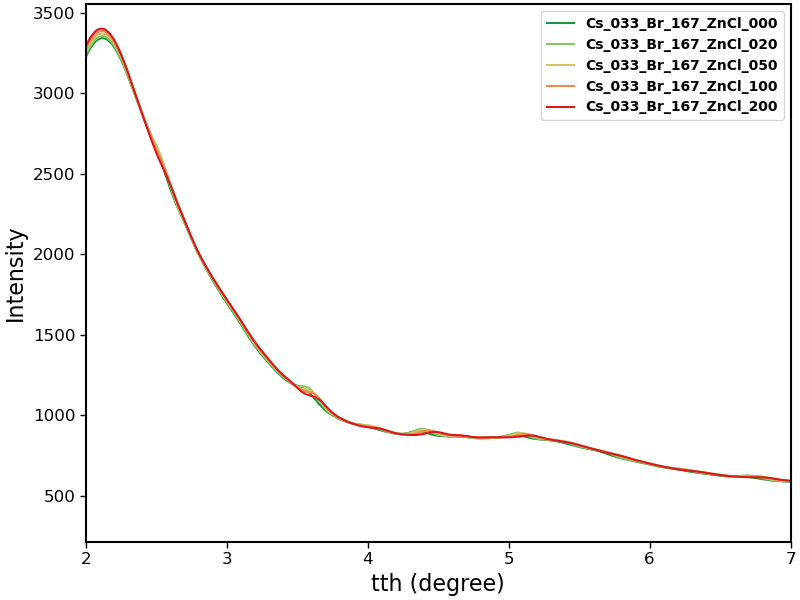

In [30]:
f2, ax2 = plt.subplots(1, 1, figsize = (8, 6), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

# mpld3.disable_notebook()
# label = title
# k = len(title)
color_idx = np.linspace(0, 1, len(k1))
offset = 0
for i in range(len(k1)):
    # ax2.plot(df_tth.iloc[:,i], df_int.iloc[:,i], color=cmap(color_idx[i]), label=label[i])
    ax2.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=k1[i])

legend_properties = {'weight':'bold', 'size':10}    
ax2.legend(prop=legend_properties)

ax2.set_xlim(2, 7)
# ax2.set_ylim(2500, 9500)
ax2.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
ax2.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax2.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax2.spines["bottom"].set_linewidth(spinewidth)
ax2.spines["right"].set_linewidth(spinewidth)
ax2.spines["top"].set_linewidth(spinewidth)
ax2.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

# Check bkg scale factor for subtraction

In [31]:
cwd = '/Users/chenghunglin/Documents/20240602_XPD/Toluene_OleAcid_mask/'
bkg_fn = cwd + '/Toluene_OleAcid_mask_mean_tth.xy'
bkg = pd.read_csv(bkg_fn, sep = ' ', names=['tth_bkg', 'Int_bkg'])
# bkg_scale = [0.9948, 0.985, 0.98, 1.005, 1.006]
# bkg_scale = [0.98, 0.98, 0.98, 0.98, 0.98]
bkg_scale = [1.05, 1.05, 1.05, 1.05, 1.05]
i = 4
min(df_int[k1[i]].to_numpy() - bkg['Int_bkg'][25:].to_numpy()*bkg_scale[i])

1.5200728296874786

In [32]:
bkg['Int_bkg'][25:]

25      1746.641480
26      1758.635740
27      1771.071570
28      1780.873370
29      1788.400110
           ...     
2995     360.010732
2996     361.133087
2997     362.193166
2998     362.107076
2999     361.365153
Name: Int_bkg, Length: 2975, dtype: float64

In [33]:
df_int[k1[i]]

0       1919.537720
1       1928.742188
2       1938.936890
3       1946.609497
4       1953.907593
           ...     
2970     381.028717
2971     381.606628
2972     382.759430
2973     381.837616
2974     382.292603
Name: Cs_033_Br_167_ZnCl_200, Length: 2975, dtype: float64

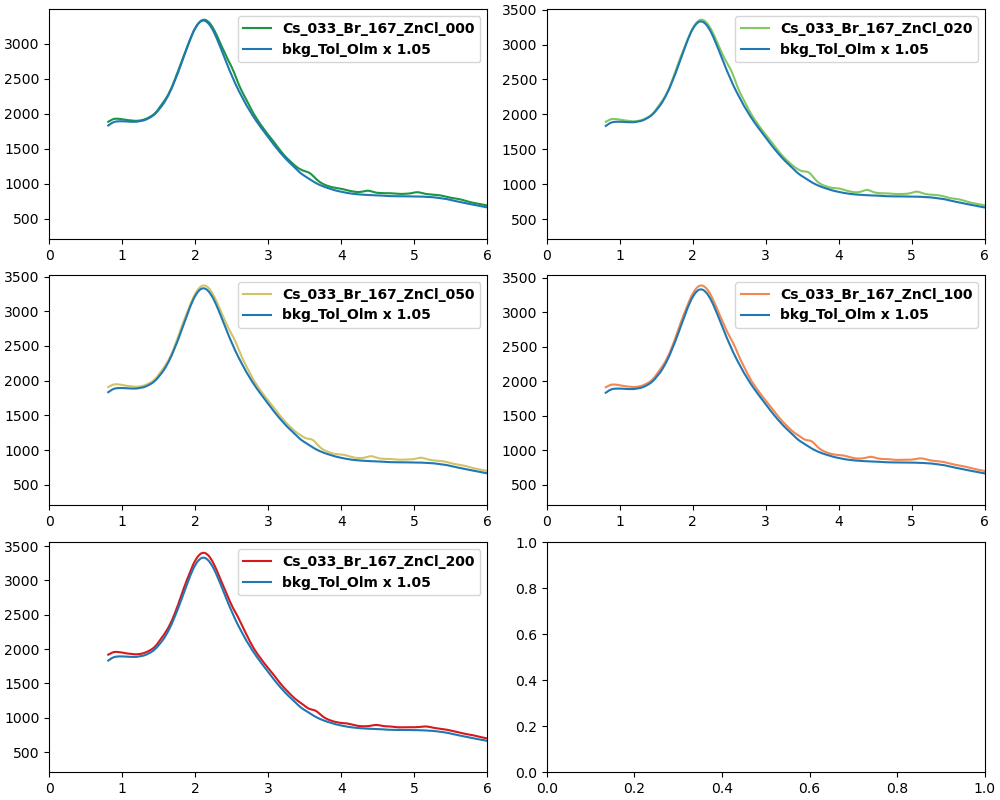

In [34]:
f3, ax3 = plt.subplots(3, 2, figsize = (10, 8), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})
ax3 = ax3.flatten()
legend_properties = {'weight':'bold', 'size':10}

# mpld3.disable_notebook()
# label = title
# k = len(title)
color_idx = np.linspace(0, 1, len(k1))
for i in range(len(k1)):
    # color_idx = np.linspace(0, 1, len(k1[i]))
    ax3[i].plot(df_tth.iloc[:,i], df_int[k1[i]], color=cmap(color_idx[i]), label=k1[i])
    ax3[i].plot(bkg['tth_bkg'][25:], bkg['Int_bkg'][25:]*bkg_scale[i], label=f'bkg_Tol_Olm x {bkg_scale[i]}')
    ax3[i].legend(prop=legend_properties)
    ax3[i].set_xlim(0, 6)
    # ax3[i].set_ylim(-200, 8000)
    # print(i, color_idx[i])

# Plot subtracted pdf data

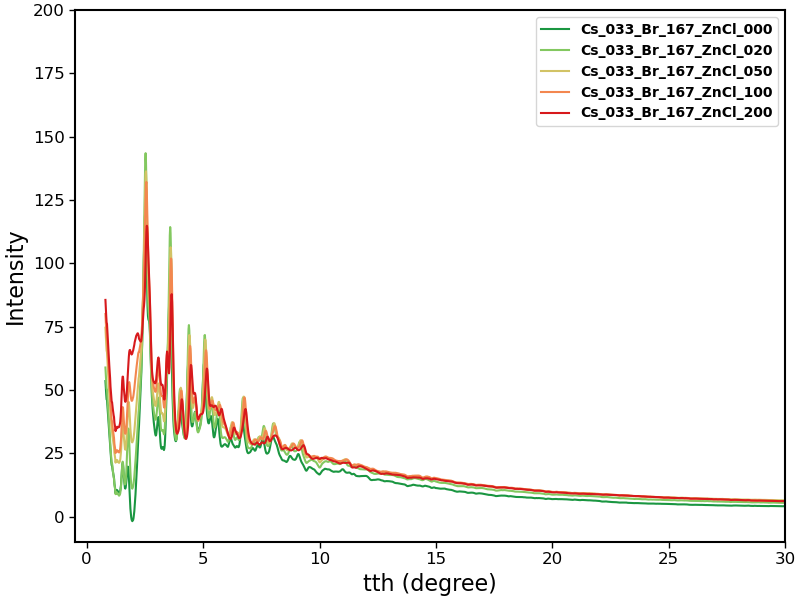

In [39]:
f4, ax4 = plt.subplots(1, 1, figsize = (8, 6), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

color_idx = np.linspace(0, 1, len(k1))
offset = 0
for i in range(len(k1)):
    # ax1.plot(df_tth.iloc[:,i], df_int.iloc[:,i], color=cmap(color_idx[i]), label=label[i])
    scaled_int = df_int[k1[i]].to_numpy() - bkg['Int_bkg'][25:].to_numpy()*bkg_scale[i]
    ax4.plot(df_tth.iloc[:,i], scaled_int, color=cmap(color_idx[i]), label=k1[i])

legend_properties = {'weight':'bold', 'size':10}    
ax4.legend(prop=legend_properties)

ax4.set_xlim(-0.5, 30)
ax4.set_ylim(-10, 200)
ax4.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
ax4.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax4.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax4.spines["bottom"].set_linewidth(spinewidth)
ax4.spines["right"].set_linewidth(spinewidth)
ax4.spines["top"].set_linewidth(spinewidth)
ax4.spines["left"].set_linewidth(spinewidth)

# Subtract bkg and Save as another .xy

In [36]:
cwd = '/Users/chenghunglin/Documents/20240602_XPD/Cs_033_Br_167_/tth_bkg_sub/'
path = cwd
# name = ['CsPbBr_ZnCl_00', 'CsPbBr_ZnCl_08', 'CsPbBr_ZnCl_16', 'CsPbBr_ZnCl_32', 'CsPbBr_ZnCl_64']
for i in range(len(k1)):
    df = pd.DataFrame()
    df['tth'] = df_tth.iloc[:,i]
    df['Intensity'] = df_int[k1[i]] - bkg['Int_bkg']*bkg_scale[i]
    fn = cwd + '/' + os.path.basename(subfolder[i])[:-4] + '_sub_01.xy'
    # df.to_csv(fn, sep=' ', header=False, index=False, float_format='{:.8e}'.format)
    print(os.path.basename(fn))

Cs_033_Br_167_PF_020_Tol_1100_20240603-035654_4accd1_primary-1_mean_tth_sub_01.xy
Cs_033_Br_167_PF_022_ZnCl_020_Tol_1210_20240603-043640_608bf1_primary-1_mean_tth_sub_01.xy
Cs_033_Br_167_PF_025_ZnCl_050_Tol_1375_20240603-050641_ad5ddd_primary-1_mean_tth_sub_01.xy
Cs_033_Br_167_PF_030_ZnCl_100_Tol_1650_20240603-055600_827056_primary-1_mean_tth_sub_01.xy
Cs_033_Br_167_PF_040_ZnCl_200_Tol_2200_20240603-062247_ad21d5_primary-1_mean_tth_sub_01.xy


In [37]:
fn

'/Users/chenghunglin/Documents/20240602_XPD/Cs_033_Br_167_/tth_bkg_sub//Cs_033_Br_167_PF_040_ZnCl_200_Tol_2200_20240603-062247_ad21d5_primary-1_mean_tth_sub_01.xy'